In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../Data/ecommerce_data.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [4]:
df[df.isnull().any(axis=1)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [5]:
df.dropna(inplace=True)

In [6]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [7]:
df['CustomerID'] = df['CustomerID'].astype('int64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null int64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [9]:
df.reset_index(inplace=True)

In [10]:
df['Quantity'].describe().round()

count    406829.0
mean         12.0
std         249.0
min      -80995.0
25%           2.0
50%           5.0
75%          12.0
max       80995.0
Name: Quantity, dtype: float64

In [11]:
df['UnitPrice'].describe().round(1)

count    406829.0
mean          3.5
std          69.3
min           0.0
25%           1.2
50%           2.0
75%           3.8
max       38970.0
Name: UnitPrice, dtype: float64

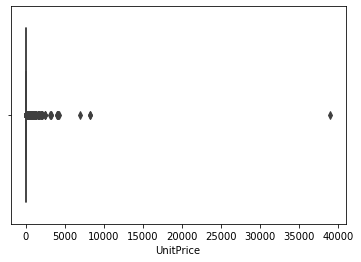

In [12]:
sns.boxplot(x=df['UnitPrice'])

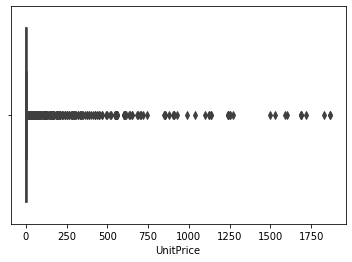

In [13]:
drop_idx = df[df['UnitPrice'] > 2000].index
sns.boxplot(x=df['UnitPrice'].drop(drop_idx))

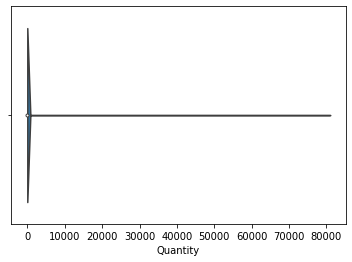

In [14]:
df = df[df['Quantity'] > 0]
sns.violinplot(x=df['Quantity'])

In [15]:
df['TotalSpent'] = df['Quantity'] * df['UnitPrice']
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [16]:
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent,MonthYear
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


In [17]:
L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']
df = df.join(pd.concat((getattr(df['InvoiceDate'].dt, i).rename(i.capitalize()) for i in L), axis=1))
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent,MonthYear,Year,Month,Day,Dayofweek,Dayofyear,Weekofyear,Quarter
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,2,335,48,4
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,2,335,48,4
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4


In [18]:
df['Dayofweek'].unique()

array([2, 3, 4, 6, 0, 1], dtype=int64)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 406828
Data columns (total 18 columns):
index          397924 non-null int64
InvoiceNo      397924 non-null object
StockCode      397924 non-null object
Description    397924 non-null object
Quantity       397924 non-null int64
InvoiceDate    397924 non-null datetime64[ns]
UnitPrice      397924 non-null float64
CustomerID     397924 non-null int64
Country        397924 non-null object
TotalSpent     397924 non-null float64
MonthYear      397924 non-null period[M]
Year           397924 non-null int64
Month          397924 non-null int64
Day            397924 non-null int64
Dayofweek      397924 non-null int64
Dayofyear      397924 non-null int64
Weekofyear     397924 non-null int64
Quarter        397924 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(10), object(4), period[M](1)
memory usage: 67.7+ MB


In [20]:
df['Dayofweek'] = df['Dayofweek'] + 1

In [21]:
df.drop(['index'], axis=1, inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent,MonthYear,Year,Month,Day,Dayofweek,Dayofyear,Weekofyear,Quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4


In [22]:
sales_per_customer = df.groupby(['CustomerID'], as_index=False)['InvoiceNo'].count()
sales_per_customer.columns = ['CustomerID', 'TotalOrder']
sales_per_customer.head(10)

,CustomerID,TotalOrder
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17
5,12352,85
6,12353,4
7,12354,58
8,12355,13
9,12356,59


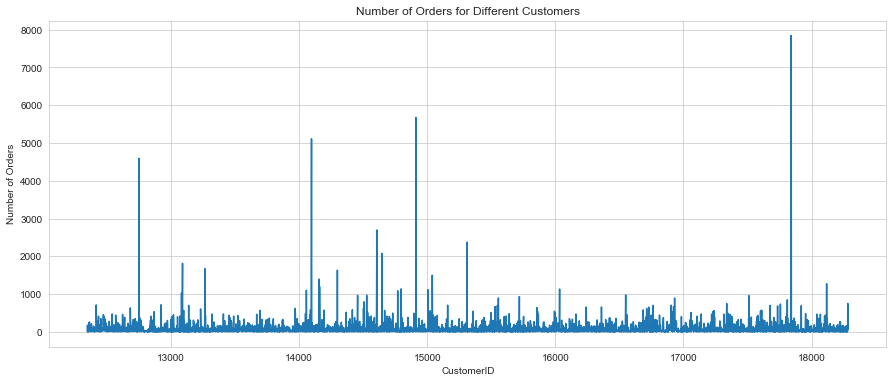

In [23]:
sns.set_style('whitegrid')
plt.subplots(figsize=(15, 6))
plt.plot(sales_per_customer['CustomerID'], sales_per_customer['TotalOrder'])
plt.xlabel('CustomerID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for Different Customers')
plt.show()

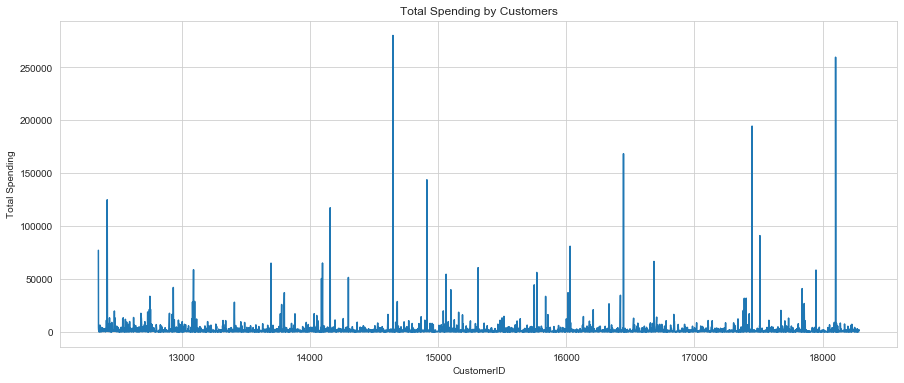

In [24]:
spent_by_customers = df.groupby(['CustomerID'], as_index=False)['TotalSpent'].sum()

plt.subplots(figsize=(15, 6))
plt.plot(spent_by_customers['CustomerID'], spent_by_customers['TotalSpent'])
plt.xlabel('CustomerID')
plt.ylabel('Total Spending')
plt.title('Total Spending by Customers')
plt.show()

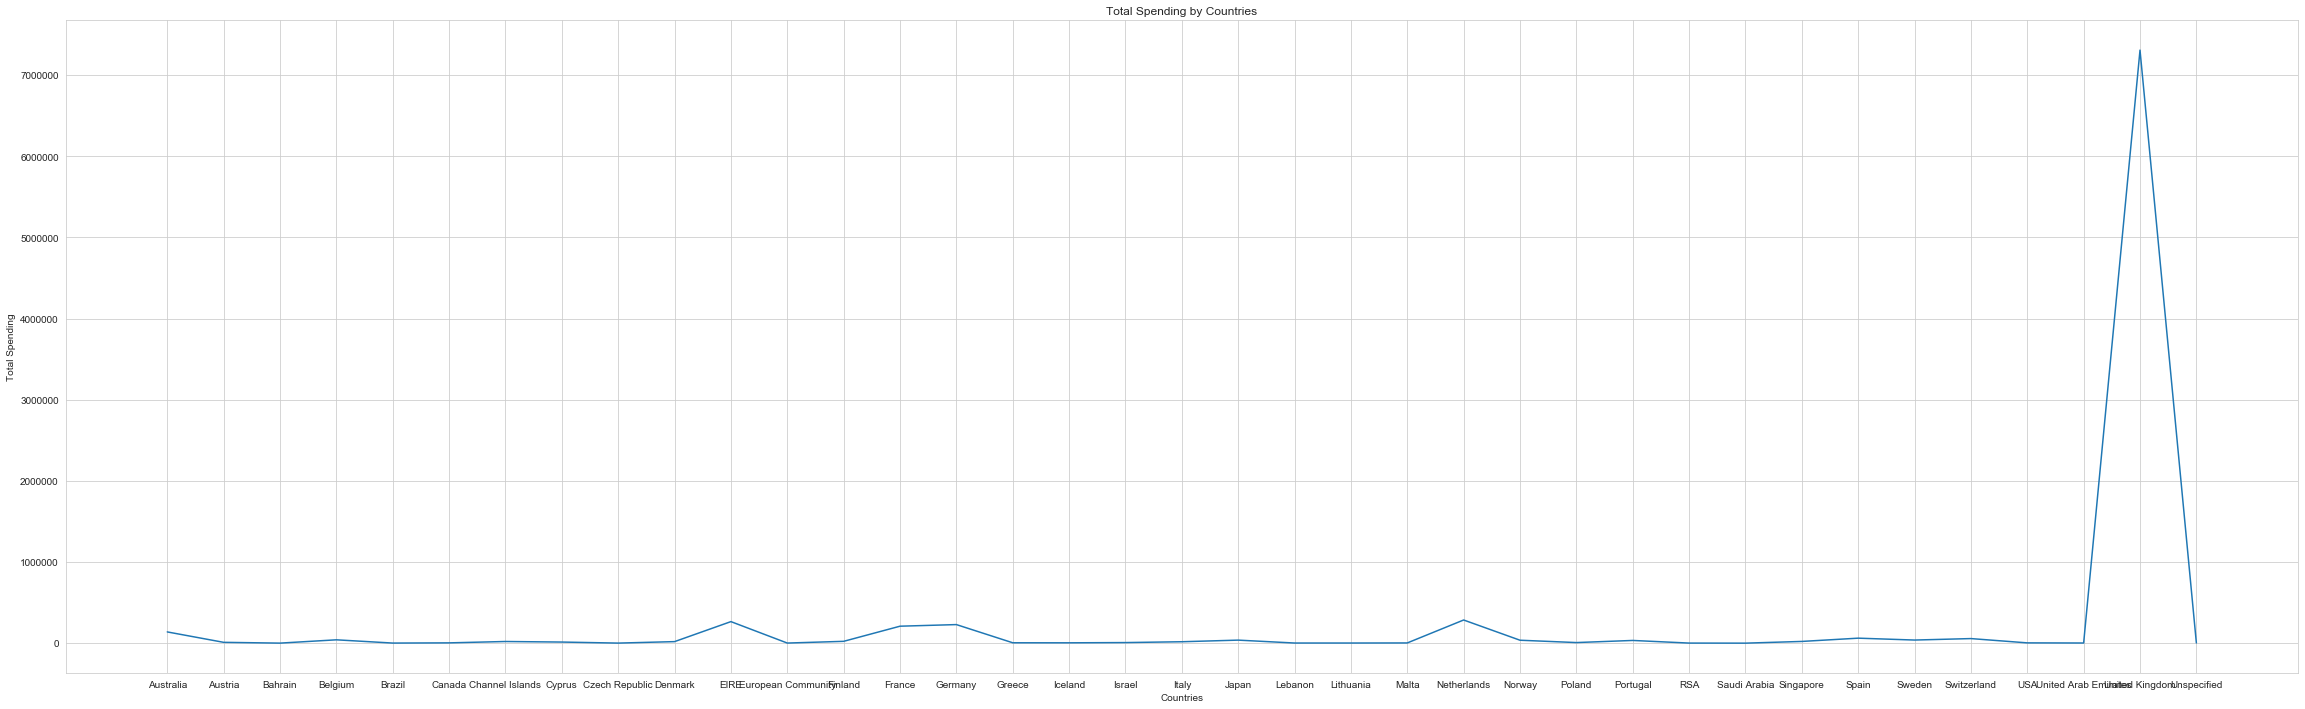

In [25]:
by_country = df.groupby(['Country'], as_index=False)[['Quantity', 'TotalSpent']].sum()

plt.subplots(figsize=(40, 12))
plt.plot(by_country['Country'], by_country['TotalSpent'])
plt.xlabel('Countries')
plt.ylabel('Total Spending')
plt.title('Total Spending by Countries')
plt.show()

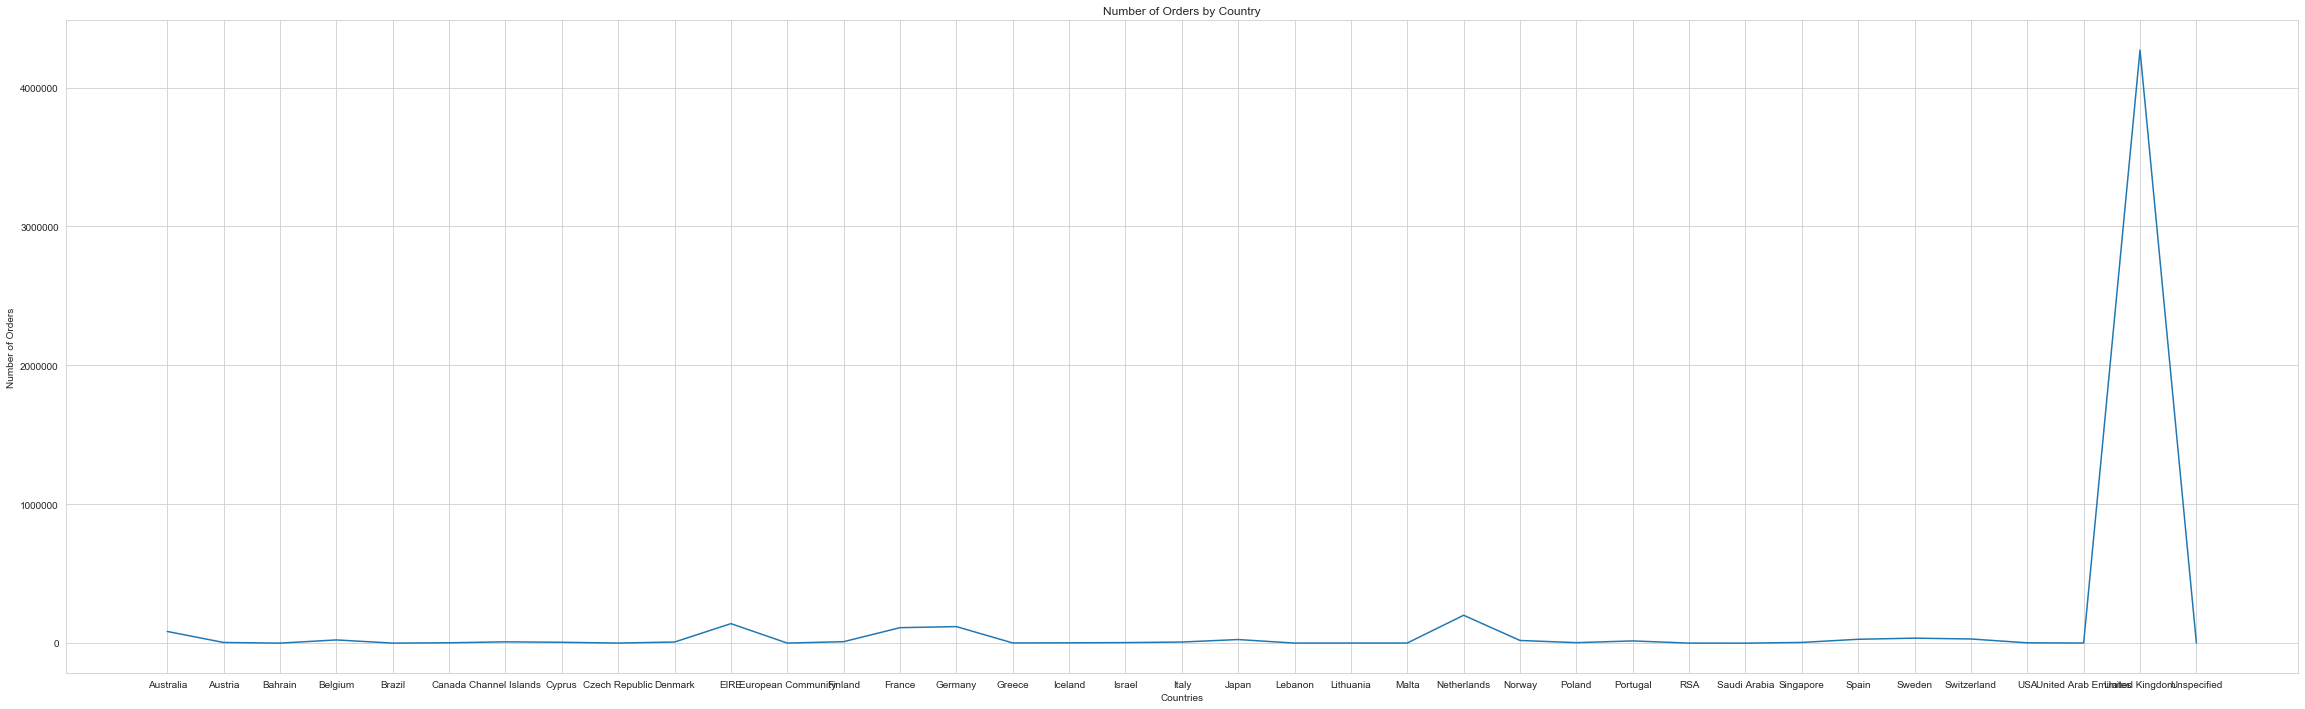

In [26]:
plt.subplots(figsize=(40, 12))
plt.plot(by_country['Country'], by_country['Quantity'])
plt.xlabel('Countries')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Country')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


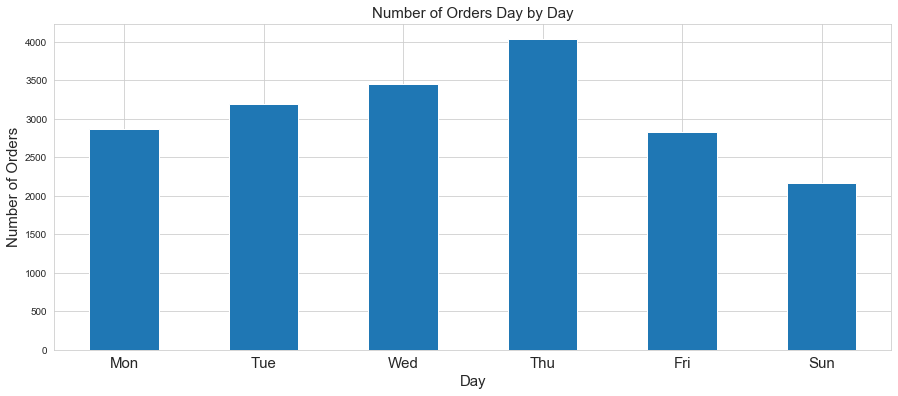

In [27]:
ax = df.groupby(['InvoiceNo'])['Dayofweek'].unique().value_counts().sort_index().plot('bar', figsize=(15, 6))
ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('Number of Orders Day by Day', fontsize=15)
ax.set_xticklabels(('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sun'), rotation='horizontal', fontsize=15)
plt.show()

In [28]:
df['YearMonth'] = df['InvoiceDate'].map(lambda x: 100*x.year + x.month)
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent,MonthYear,Year,Month,Day,Dayofweek,Dayofyear,Weekofyear,Quarter,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4,201012


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


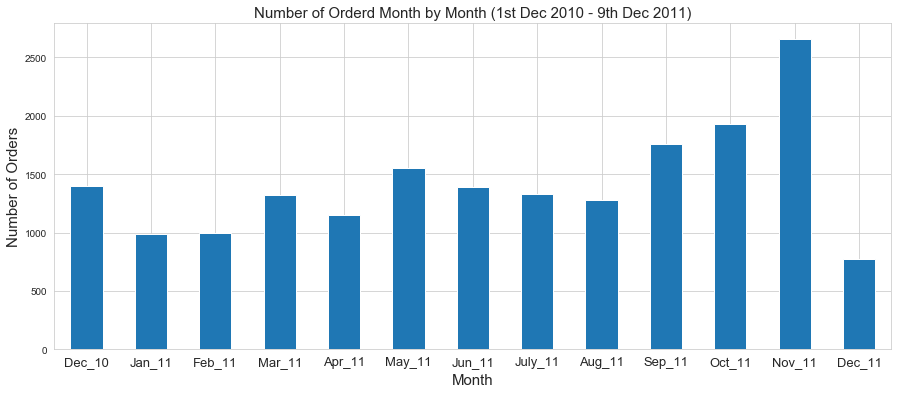

In [29]:
ax = df.groupby('InvoiceNo')['YearMonth'].unique().value_counts().sort_index().plot('bar', figsize=(15,6))
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('Number of Orderd Month by Month (1st Dec 2010 - 9th Dec 2011)', fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


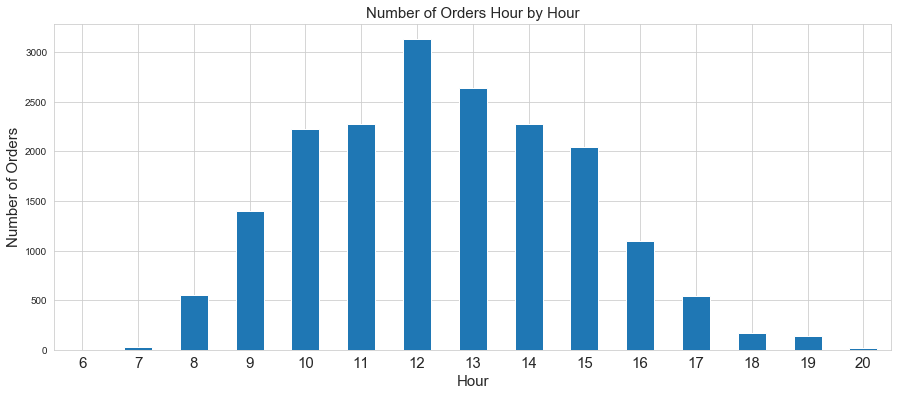

In [30]:
df['Hour'] = df['InvoiceDate'].dt.hour

ax = df.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index().plot('bar' ,figsize=(15, 6))
ax.set_xlabel('Hour', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('Number of Orders Hour by Hour', fontsize=15)
ax.set_xticklabels(range(6, 21), rotation='horizontal', fontsize=15)
plt.show()

In [31]:
date_item_df = df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()
date_item_df.head()

InvoiceDate  StockCode
2010-12-31   10002        224
             10120         16
             10123C         1
             10124A         4
             10124G         5
Name: Quantity, dtype: int64

In [32]:
last_month_sorted_df = date_item_df.loc['2011-11-30']
last_month_sorted_df = last_month_sorted_df.reset_index()
last_month_sorted_df.sort_values(by='Quantity', ascending=False).head(10)

,InvoiceDate,StockCode,Quantity
2371,2011-11-30,84826,12551
1567,2011-11-30,23084,12393
827,2011-11-30,22197,8458
738,2011-11-30,22086,5919
2488,2011-11-30,85099B,5678
2385,2011-11-30,84879,5190
1135,2011-11-30,22578,4981
2498,2011-11-30,85123A,4861
1134,2011-11-30,22577,4582
2278,2011-11-30,84077,4500


In [33]:
date_item_df = df.loc[df['StockCode'].isin(['23084', '84826', '22197', '22086', '85099B'])].set_index(
    'InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()
date_item_df

InvoiceDate  StockCode
2010-12-31   22086         1697
             22197         2110
             84826          366
             85099B        2056
2011-01-31   22197         1697
             84826          480
             85099B        2625
2011-02-28   22086            2
             22197         2505
             84826           66
             85099B        2971
2011-03-31   22086           85
             22197         2034
             84826           60
             85099B        4924
2011-04-30   22086           11
             22197         1801
             84826            1
             85099B        2211
2011-05-31   22086           12
             22197         6738
             23084         1097
             85099B        3470
2011-06-30   22086          337
             22197         1989
             23084         1621
             84826            1
             85099B        3529
2011-07-31   22086          374
             22197         1787
             2308

In [34]:
trending_items_df = date_item_df.reset_index().pivot('InvoiceDate', 'StockCode').fillna(0)
trending_items_df = trending_items_df.reset_index()
trending_items_df = trending_items_df.set_index('InvoiceDate')
trending_items_df.columns = trending_items_df.columns.droplevel(0)
trending_items_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,1697.0,2110.0,0.0,366.0,2056.0
2011-01-31,0.0,1697.0,0.0,480.0,2625.0
2011-02-28,2.0,2505.0,0.0,66.0,2971.0
2011-03-31,85.0,2034.0,0.0,60.0,4924.0
2011-04-30,11.0,1801.0,0.0,1.0,2211.0
2011-05-31,12.0,6738.0,1097.0,0.0,3470.0
2011-06-30,337.0,1989.0,1621.0,1.0,3529.0
2011-07-31,374.0,1787.0,236.0,2.0,2970.0
2011-08-31,480.0,5286.0,1813.0,72.0,5278.0


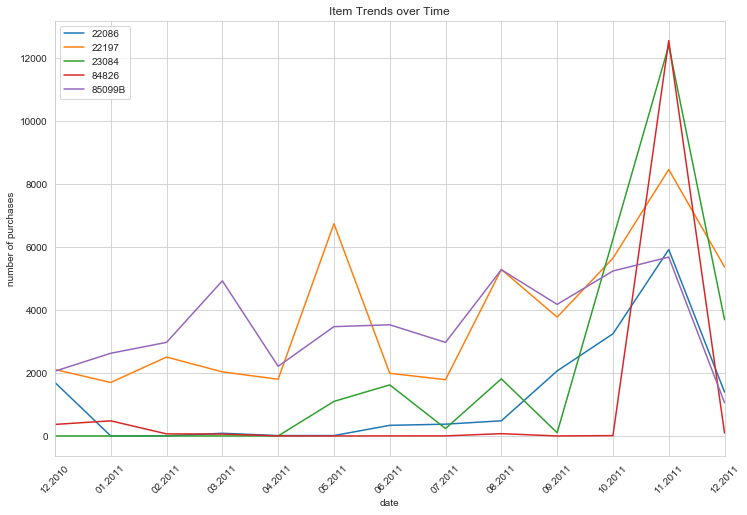

In [35]:
ax = pd.DataFrame(trending_items_df.values).plot(figsize=(12,8), grid=True)
ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')
ax.legend(trending_items_df.columns, loc='upper left')
plt.xticks(range(len(trending_items_df.index)), [x.strftime('%m.%Y') for x in trending_items_df.index], rotation=45)
plt.show()